In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BIT_2023_1차.csv')
df

,time,Open,High,Low,Close,Volume,returns,volatility,price,quote_qty,is_buyer_maker,quote_qty_cal
0,2023-01-01 0:00,16537.5,16540.9,16504.0,16527.0,5381.399,NaN,NaN,16524.52574,7264.129209,16494,8.892507e+07
1,2023-01-01 1:00,16527.1,16554.3,16524.1,16550.4,3210.826,0.001416,NaN,16537.21599,6819.889969,8705,5.309812e+07
2,2023-01-01 2:00,16550.5,16557.1,16534.8,16542.4,2399.668,-0.000483,NaN,16545.81814,6030.420093,8468,3.970447e+07
3,2023-01-01 3:00,16542.5,16542.5,16515.0,16529.3,3214.480,-0.000792,NaN,16525.58208,7003.352799,10007,5.312115e+07
4,2023-01-01 4:00,16529.2,16530.4,16508.8,16517.8,3150.954,-0.000696,NaN,16518.28642,7378.899423,9476,5.204836e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00,42701.7,42741.9,42624.7,42659.9,3944.096,-0.000977,0.003040,42679.29053,14458.392200,23305,1.683312e+08
8756,2023-12-31 20:00,42659.9,42724.5,42543.3,42599.1,4730.936,-0.001425,0.002863,42625.85360,12326.119420,28014,2.016602e+08
8757,2023-12-31 21:00,42599.2,42717.0,42558.2,42558.9,3794.010,-0.000944,0.002673,42634.52352,13367.479780,21732,1.617558e+08
8758,2023-12-31 22:00,42559.0,42629.5,42111.9,42294.8,11952.346,-0.006206,0.003008,42405.77979,19111.648040,67159,5.068486e+08


In [3]:
# volatility가 NaN인 행 추출
missing_rows = df[df['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_rows['time']

# 결과 출력
print(missing_time)

0        2023-01-01 0:00
1        2023-01-01 1:00
2        2023-01-01 2:00
3        2023-01-01 3:00
4        2023-01-01 4:00
              ...       
8031    2023-12-01 15:00
8032    2023-12-01 16:00
8033    2023-12-01 17:00
8034    2023-12-01 18:00
8035    2023-12-01 19:00
Name: time, Length: 186, dtype: object


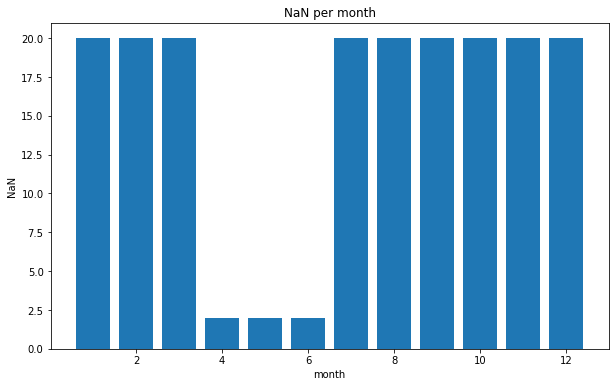

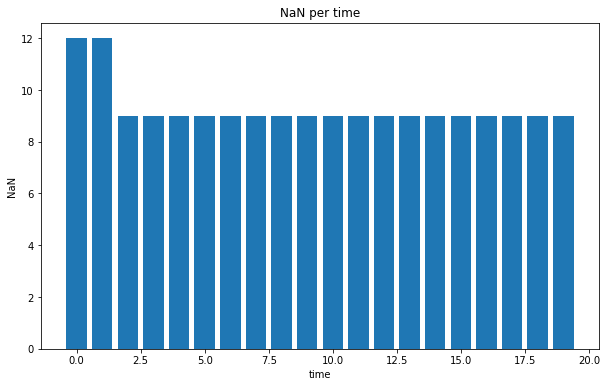

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# volatility가 NaN인 행 추출
missing_rows = df[df['volatility'].isna()]

# 시간 데이터 추출
missing_time = missing_rows['time']

# 시간 데이터를 월과 시간으로 변환
missing_time_month = missing_time.dt.month
missing_time_hour = missing_time.dt.hour

# 월별 결측치 개수 계산
missing_count_by_month = missing_time_month.value_counts().sort_index()

# 시간대별 결측치 개수 계산
missing_count_by_hour = missing_time_hour.value_counts().sort_index()

# 월별 결측치 개수 그래프
plt.figure(figsize=(10, 6))
plt.bar(missing_count_by_month.index, missing_count_by_month.values)
plt.xlabel('month')
plt.ylabel('NaN')
plt.title('NaN per month')
plt.show()

# 시간대별 결측치 개수 그래프
plt.figure(figsize=(10, 6))
plt.bar(missing_count_by_hour.index, missing_count_by_hour.values)
plt.xlabel('time')
plt.ylabel('NaN')
plt.title('NaN per time')
plt.show()


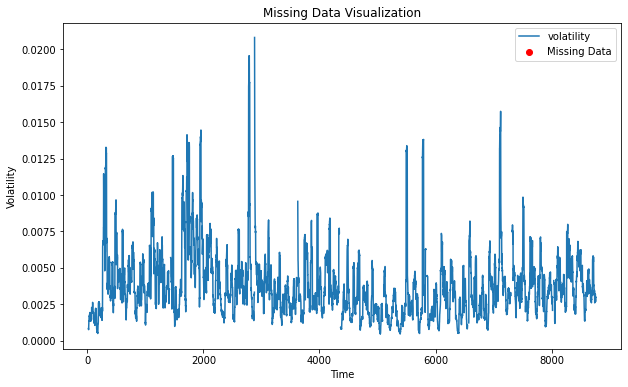

In [5]:
# 결측치가 있는 시간 데이터 추출
missing_time = df.loc[df['volatility'].isna()].index

# 결측치를 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['volatility'], label='volatility')
plt.scatter(missing_time, [None] * len(missing_time), color='red', label='Missing Data')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Missing Data Visualization')
plt.legend()
plt.show()

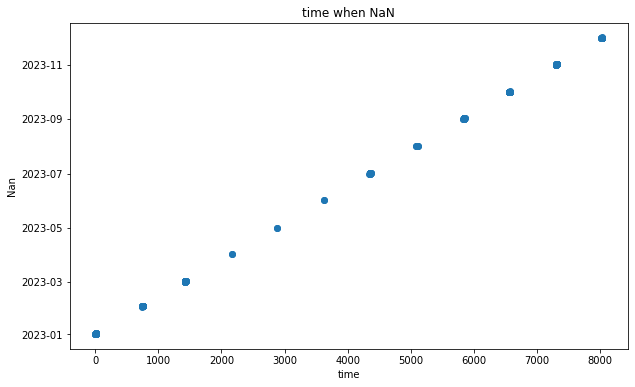

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# volatility가 NaN인 행 추출
missing_rows = df[df['volatility'].isna()]

# 시간 데이터 추출
missing_time = missing_rows['time']

# 시간 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(missing_time, marker='o', linestyle='None')
plt.xlabel('time')
plt.ylabel('Nan')
plt.title('time when NaN')
plt.show()

In [7]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 1월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 1)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

0    2023-01-01 00:00:00
1    2023-01-01 01:00:00
2    2023-01-01 02:00:00
3    2023-01-01 03:00:00
4    2023-01-01 04:00:00
5    2023-01-01 05:00:00
6    2023-01-01 06:00:00
7    2023-01-01 07:00:00
8    2023-01-01 08:00:00
9    2023-01-01 09:00:00
10   2023-01-01 10:00:00
11   2023-01-01 11:00:00
12   2023-01-01 12:00:00
13   2023-01-01 13:00:00
14   2023-01-01 14:00:00
15   2023-01-01 15:00:00
16   2023-01-01 16:00:00
17   2023-01-01 17:00:00
18   2023-01-01 18:00:00
19   2023-01-01 19:00:00
Name: time, dtype: datetime64[ns]


In [8]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 2월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 2)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

744   2023-02-01 00:00:00
745   2023-02-01 01:00:00
746   2023-02-01 02:00:00
747   2023-02-01 03:00:00
748   2023-02-01 04:00:00
749   2023-02-01 05:00:00
750   2023-02-01 06:00:00
751   2023-02-01 07:00:00
752   2023-02-01 08:00:00
753   2023-02-01 09:00:00
754   2023-02-01 10:00:00
755   2023-02-01 11:00:00
756   2023-02-01 12:00:00
757   2023-02-01 13:00:00
758   2023-02-01 14:00:00
759   2023-02-01 15:00:00
760   2023-02-01 16:00:00
761   2023-02-01 17:00:00
762   2023-02-01 18:00:00
763   2023-02-01 19:00:00
Name: time, dtype: datetime64[ns]


In [9]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 3월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 3)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

1416   2023-03-01 00:00:00
1417   2023-03-01 01:00:00
1418   2023-03-01 02:00:00
1419   2023-03-01 03:00:00
1420   2023-03-01 04:00:00
1421   2023-03-01 05:00:00
1422   2023-03-01 06:00:00
1423   2023-03-01 07:00:00
1424   2023-03-01 08:00:00
1425   2023-03-01 09:00:00
1426   2023-03-01 10:00:00
1427   2023-03-01 11:00:00
1428   2023-03-01 12:00:00
1429   2023-03-01 13:00:00
1430   2023-03-01 14:00:00
1431   2023-03-01 15:00:00
1432   2023-03-01 16:00:00
1433   2023-03-01 17:00:00
1434   2023-03-01 18:00:00
1435   2023-03-01 19:00:00
Name: time, dtype: datetime64[ns]


In [10]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 4월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 4)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

2160   2023-04-01 00:00:00
2161   2023-04-01 01:00:00
Name: time, dtype: datetime64[ns]


In [11]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 5월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 5)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

2880   2023-05-01 00:00:00
2881   2023-05-01 01:00:00
Name: time, dtype: datetime64[ns]


In [12]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 6월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 6)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

3624   2023-06-01 00:00:00
3625   2023-06-01 01:00:00
Name: time, dtype: datetime64[ns]


In [13]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 7월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 7)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

4344   2023-07-01 00:00:00
4345   2023-07-01 01:00:00
4346   2023-07-01 02:00:00
4347   2023-07-01 03:00:00
4348   2023-07-01 04:00:00
4349   2023-07-01 05:00:00
4350   2023-07-01 06:00:00
4351   2023-07-01 07:00:00
4352   2023-07-01 08:00:00
4353   2023-07-01 09:00:00
4354   2023-07-01 10:00:00
4355   2023-07-01 11:00:00
4356   2023-07-01 12:00:00
4357   2023-07-01 13:00:00
4358   2023-07-01 14:00:00
4359   2023-07-01 15:00:00
4360   2023-07-01 16:00:00
4361   2023-07-01 17:00:00
4362   2023-07-01 18:00:00
4363   2023-07-01 19:00:00
Name: time, dtype: datetime64[ns]


In [14]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 8월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 8)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

5088   2023-08-01 00:00:00
5089   2023-08-01 01:00:00
5090   2023-08-01 02:00:00
5091   2023-08-01 03:00:00
5092   2023-08-01 04:00:00
5093   2023-08-01 05:00:00
5094   2023-08-01 06:00:00
5095   2023-08-01 07:00:00
5096   2023-08-01 08:00:00
5097   2023-08-01 09:00:00
5098   2023-08-01 10:00:00
5099   2023-08-01 11:00:00
5100   2023-08-01 12:00:00
5101   2023-08-01 13:00:00
5102   2023-08-01 14:00:00
5103   2023-08-01 15:00:00
5104   2023-08-01 16:00:00
5105   2023-08-01 17:00:00
5106   2023-08-01 18:00:00
5107   2023-08-01 19:00:00
Name: time, dtype: datetime64[ns]


In [15]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 9월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 9)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

5832   2023-09-01 00:00:00
5833   2023-09-01 01:00:00
5834   2023-09-01 02:00:00
5835   2023-09-01 03:00:00
5836   2023-09-01 04:00:00
5837   2023-09-01 05:00:00
5838   2023-09-01 06:00:00
5839   2023-09-01 07:00:00
5840   2023-09-01 08:00:00
5841   2023-09-01 09:00:00
5842   2023-09-01 10:00:00
5843   2023-09-01 11:00:00
5844   2023-09-01 12:00:00
5845   2023-09-01 13:00:00
5846   2023-09-01 14:00:00
5847   2023-09-01 15:00:00
5848   2023-09-01 16:00:00
5849   2023-09-01 17:00:00
5850   2023-09-01 18:00:00
5851   2023-09-01 19:00:00
Name: time, dtype: datetime64[ns]


In [16]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 10월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 10)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

6552   2023-10-01 00:00:00
6553   2023-10-01 01:00:00
6554   2023-10-01 02:00:00
6555   2023-10-01 03:00:00
6556   2023-10-01 04:00:00
6557   2023-10-01 05:00:00
6558   2023-10-01 06:00:00
6559   2023-10-01 07:00:00
6560   2023-10-01 08:00:00
6561   2023-10-01 09:00:00
6562   2023-10-01 10:00:00
6563   2023-10-01 11:00:00
6564   2023-10-01 12:00:00
6565   2023-10-01 13:00:00
6566   2023-10-01 14:00:00
6567   2023-10-01 15:00:00
6568   2023-10-01 16:00:00
6569   2023-10-01 17:00:00
6570   2023-10-01 18:00:00
6571   2023-10-01 19:00:00
Name: time, dtype: datetime64[ns]


In [17]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 11월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 11)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

7296   2023-11-01 00:00:00
7297   2023-11-01 01:00:00
7298   2023-11-01 02:00:00
7299   2023-11-01 03:00:00
7300   2023-11-01 04:00:00
7301   2023-11-01 05:00:00
7302   2023-11-01 06:00:00
7303   2023-11-01 07:00:00
7304   2023-11-01 08:00:00
7305   2023-11-01 09:00:00
7306   2023-11-01 10:00:00
7307   2023-11-01 11:00:00
7308   2023-11-01 12:00:00
7309   2023-11-01 13:00:00
7310   2023-11-01 14:00:00
7311   2023-11-01 15:00:00
7312   2023-11-01 16:00:00
7313   2023-11-01 17:00:00
7314   2023-11-01 18:00:00
7315   2023-11-01 19:00:00
Name: time, dtype: datetime64[ns]


In [18]:
import pandas as pd

# time 컬럼을 datetime 형식으로 변환
df['time'] = pd.to_datetime(df['time'])

# 2023년 12월에 해당하는 행 추출
january_2023 = df[(df['time'].dt.year == 2023) & (df['time'].dt.month == 12)]

# volatility 컬럼에 결측치가 존재하는 행 추출
missing_volatility = january_2023[january_2023['volatility'].isna()]

# time 컬럼 추출
missing_time = missing_volatility['time']

# 결과 출력
print(missing_time)

8016   2023-12-01 00:00:00
8017   2023-12-01 01:00:00
8018   2023-12-01 02:00:00
8019   2023-12-01 03:00:00
8020   2023-12-01 04:00:00
8021   2023-12-01 05:00:00
8022   2023-12-01 06:00:00
8023   2023-12-01 07:00:00
8024   2023-12-01 08:00:00
8025   2023-12-01 09:00:00
8026   2023-12-01 10:00:00
8027   2023-12-01 11:00:00
8028   2023-12-01 12:00:00
8029   2023-12-01 13:00:00
8030   2023-12-01 14:00:00
8031   2023-12-01 15:00:00
8032   2023-12-01 16:00:00
8033   2023-12-01 17:00:00
8034   2023-12-01 18:00:00
8035   2023-12-01 19:00:00
Name: time, dtype: datetime64[ns]
